Created by Robert Hildebrand (rhil@vt.edu)
April, 2022

# Shortest Path Problem

Lets create a shortest path using Dijkstra's algorithm

In [1]:
import networkx as nx

# one possible way of creating a graph

nodes = ['a','b','c','d','e','f', 'g']

weights = {
            'a': {'b':2, 'c':6}, 
            'b':{'d':5}, 
            'c':{'d':8},
            'd':{'e':10, 'f':15},
            'e':{'f':6, 'g':2},
            'f':{'g':6},
            'g':{}
           }
            
G = nx.Graph()

for v in nodes:
    G.add_node(v)

for v in nodes:
    for u in weights[v].keys():
        G.add_edge(u,v, weight = weights[v][u])

nodes = list(G.nodes())

# Plotting the graph

In [2]:
#pos = nx.spring_layout(G) 
#pos

In [41]:
from numpy import *
pos = {'a': array([-0.92373076,  .4        ]),
 'b': array([-0.81957051,  0.07467972]),
 'c': array([-0.31297755,  0.5084601]),
 'd': array([ 0.04770931, 0.3]),
 'e': array([ 0.38903572, 0.53670611]),
 'f': array([ 0.66222714, 0]),
 'g': array([ 0.95730663, 0.29462554])}

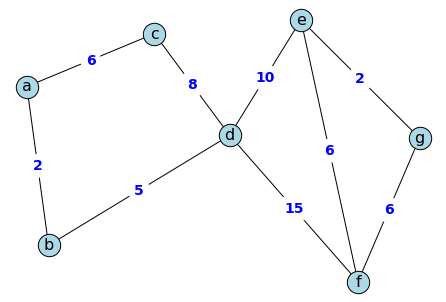

In [42]:
# Plot the graph
edge_labels = nx.get_edge_attributes(G, 'weight') 

nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels, font_size=14, rotate=False, font_color = 'b', font_weight = 'bold')
nodes_draw = nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'lightblue')
nodes_draw.set_edgecolor('black')
nx.draw_networkx_labels(G, pos,  font_size = 16);

# Use networkx to solve for the shortest path from 'a' to 'g'

In [5]:
? nx.shortest_path

In [6]:
# compute the minimum spanning tree
path = nx.shortest_path(G, 'a','g', weight = 'weight')
path

['a', 'b', 'd', 'e', 'g']

In [7]:
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_edges

[('a', 'b'), ('b', 'd'), ('d', 'e'), ('e', 'g')]

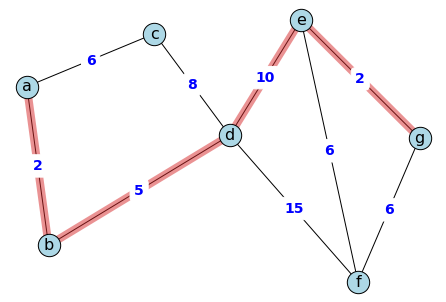

In [43]:
edgelist = path_edges

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels, font_size=14, rotate=False, font_color = 'b', font_weight = 'bold')
nx.draw_networkx_edges(G,pos,width=8,alpha=0.5,edge_color="tab:red", edgelist=edgelist)
nodes_draw = nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'lightblue',node_shape='o')
nodes_draw.set_edgecolor('black')
nx.draw_networkx_labels(G, pos,  font_size = 16);



## Lets make a convenient way to highlight edges

In [45]:
import matplotlib.pyplot as plt

def highlight(edgelist, current, visited, estimates):
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G,pos)
    nx.draw_networkx_edge_labels(G,pos, edge_labels, font_size=14, rotate=False, font_color = 'b', font_weight = 'bold')
    nx.draw_networkx_edges(G,pos,width=8,alpha=0.5,edge_color="tab:red", edgelist=edgelist)
    nodes_draw = nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'white',node_shape='o')
    nodes_draw.set_edgecolor('black')
    nodes_draw = nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'lightblue',node_shape='o', nodelist = current)
    nodes_draw.set_edgecolor('red')
    nodes_draw = nx.draw_networkx_nodes(G, pos, node_size = 500, node_color = 'pink',node_shape='o', nodelist = visited)
    nodes_draw.set_edgecolor('red')
    nx.draw_networkx_labels(G, pos,  font_size = 16);
    
    for i in range(len(nodes)):
        x = pos[nodes[i]][0]
        y = pos[nodes[i]][1]
        plt.text(x,y+0.05,s=estimates[i], bbox=dict(facecolor='green', alpha=0.2),horizontalalignment='center')


# Dijkstra's Algorithm 
We now show how to do the steps of Kruskal's algorithm

Tracking the steps

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|


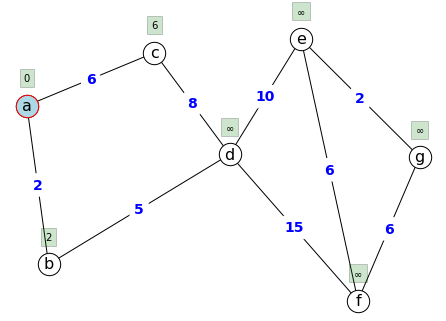

In [46]:
edgelist = []
current = ['a']
visited = []
estimates = [0, 2, 6, r"$\infty$", r"$\infty$", r"$\infty$", r"$\infty$"]

highlight(edgelist, current, visited, estimates)

Choosing b as the new current node, we can update the distance to d

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|
|b | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|

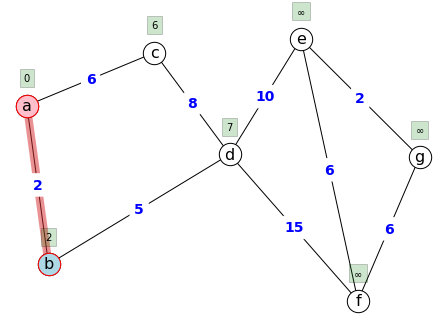

In [47]:
visited = ['a']
current = ['b']
edgelist = [('a','b')]
estimates = [0, 2, 6, 7, r"$\infty$", r"$\infty$", r"$\infty$"]

highlight(edgelist, current, visited, estimates)

Choosing b as the new current node, we can update the distance to d

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|
|b | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|c | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|

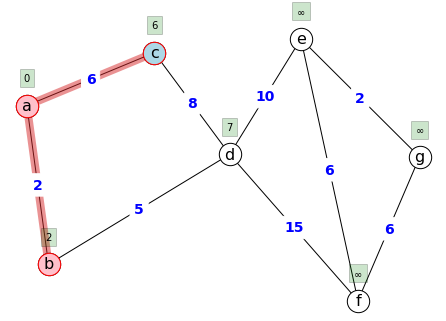

In [48]:
visited = ['a','b']
current = ['c']
edgelist = [('a','b'), ('a','c')]
estimates = [0, 2, 6, 7, r"$\infty$", r"$\infty$", r"$\infty$"]

highlight(edgelist, current, visited, estimates)

Choosing d as the new current node, we can update the distance to d

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|
|b | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|c | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|d | 0 | 2 | 6 | 7 | 17 | 22| $$\infty$$| $$\infty$$|

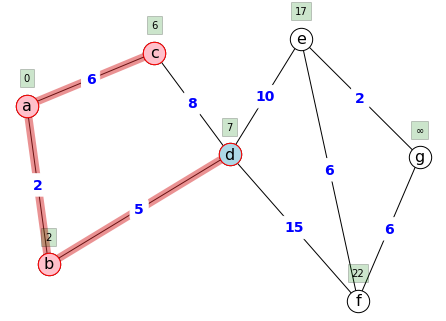

In [49]:
visited = ['a','b','c']
current = ['d']
edgelist = [('a','b'), ('a','c'), ('b','d')]
estimates = [0, 2, 6, 7, 17, 7+15, r"$\infty$"]

highlight(edgelist, current, visited, estimates)

Choosing e as the new current node, we can update the distancs

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|
|b | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|c | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|d | 0 | 2 | 6 | 7 | 17 | 22| $$\infty$$| $$\infty$$|
|e | 0 | 2 | 6 | 7 | 17 | 22| 19| 


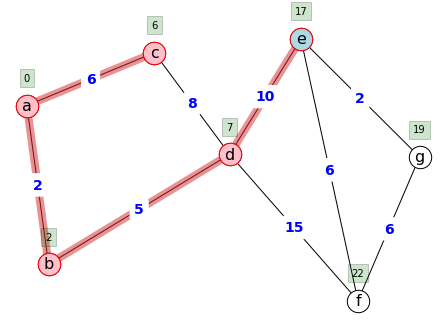

In [50]:
visited = ['a','b','c','d']
current = ['e']
edgelist = [('a','b'), ('a','c'), ('b','d'), ('d','e')]
estimates = [0, 2, 6, 7, 17, 7+15, 19]

highlight(edgelist, current, visited, estimates)

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|
|b | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|c | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|d | 0 | 2 | 6 | 7 | 17 | 22| $$\infty$$| $$\infty$$|
|e | 0 | 2 | 6 | 7 | 17 | 22| 19| 
|g | 0 | 2 | 6 | 7 | 17 | 22| 19| 

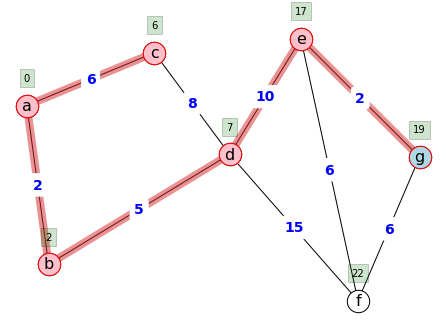

In [51]:
visited = ['a','b','c','d','e']
current = ['g']
edgelist = [('a','b'), ('a','c'), ('b','d'), ('d','e'), ('e','g')]
estimates = [0, 2, 6, 7, 17, 7+15, 17+2]

highlight(edgelist, current, visited, estimates)

| current | a | b | c | d | e | f | g|
| --- | --- | --- | --- | --- | --- | --- | --- |
|a | 0 | 2 | 6 | $$\infty$$ | $$\infty$$ | $$\infty$$| $$\infty$$|
|b | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|c | 0 | 2 | 6 | 7 | $$\infty$$ | $$\infty$$| $$\infty$$| $$\infty$$|
|d | 0 | 2 | 6 | 7 | 17 | 22| $$\infty$$| $$\infty$$|
|e | 0 | 2 | 6 | 7 | 17 | 22| 19| 
|g | 0 | 2 | 6 | 7 | 17 | 22| 19| 
|f | 0 | 2 | 6 | 7 | 17 | 22| 19| 

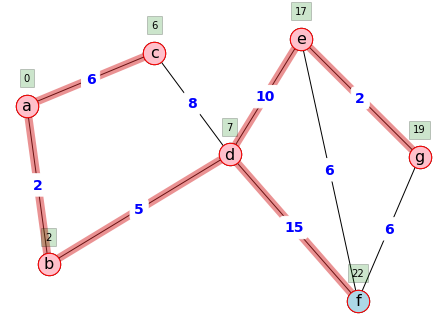

In [52]:
visited = ['a','b','c','d','e','g']
current = ['f']
edgelist = [('a','b'), ('a','c'), ('b','d'), ('d','e'), ('e','g'), ('d','f')]
estimates = [0, 2, 6, 7, 17, 7+15, 17+2]

highlight(edgelist, current, visited, estimates)

Final results

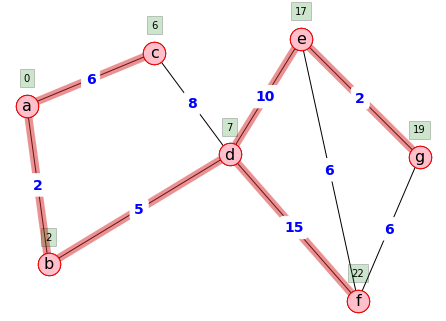

In [53]:
visited = ['a','b','c','d','e','g','f']
current = []
edgelist = [('a','b'), ('a','c'), ('b','d'), ('d','e'), ('e','g'), ('d','f')]
estimates = [0, 2, 6, 7, 17, 7+15, 17+2]

highlight(edgelist, current, visited, estimates)

### Solution
The shortest path from a to g is of length 19.  
The path is a - b - d - e - g.
